In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Elechiguerra/Desktop/IRONHACK-DataScience/Unit5-EDA/23Sep/amz_uk_price_prediction_dataset.csv")

In [4]:
# part 1: Understanding Product Categories
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

In [7]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64'), dtype('bool')]

In [9]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [10]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [11]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [12]:
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [13]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [14]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

In [15]:
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [16]:
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

False

In [17]:
# most popular category
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [18]:
# category: Sports & Outdoors is the most popular

In [19]:
#Part 2: Delving into Product Pricing

In [20]:
# Measures of Centrality:

# calculate the mean, median, and mode for the price of products.
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [21]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [22]:
# the average price of products listed is 19 pounds, but the most common price is around 10 pounds

In [23]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?


In [24]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [25]:
# Visualizations:

# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [26]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

<Axes: ylabel='price'>

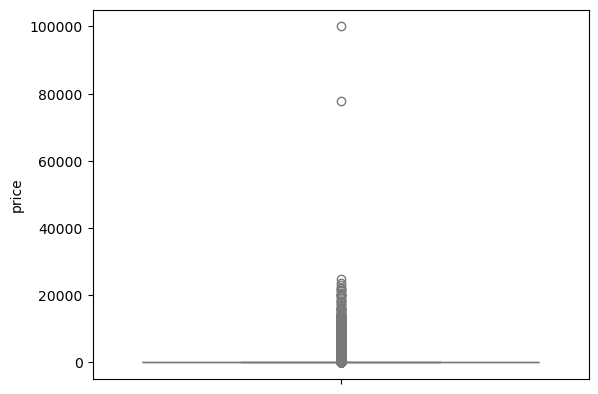

In [27]:
sns.boxplot(data = df['price'], color="lightblue")

In [28]:
# Part 3: Unpacking Product Ratings

In [29]:
# customers rate the products with stars, from zero to 5. the most common rating is zero stars

In [30]:
# Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend?

In [31]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price

(2.152836472966065, 0.0, 0.0)

In [32]:
# Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?


In [33]:
variance_rate = df['stars'].var()
std_dev_rate = df['stars'].std()
min_rate = df['stars'].min()
max_rate = df['stars'].max()
range_rate = max_rate - min_rate
quantiles_rate = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rate, std_dev_rate, min_rate, max_rate, range_rate, quantiles_rate

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [34]:
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

In [35]:
skewness_rate = df['stars'].skew()
kurtosis_rate = df['stars'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

In [36]:
# Visualizations:

#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

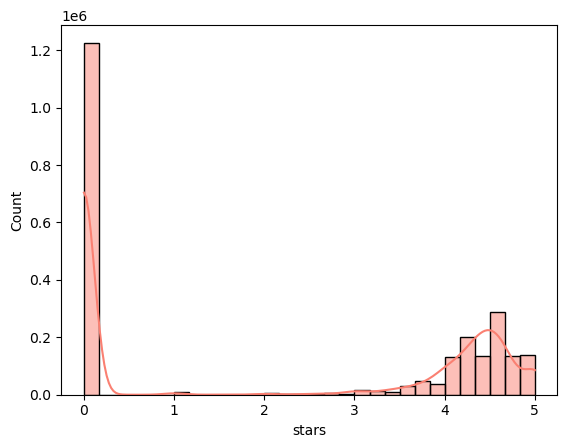

In [37]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")